In [43]:
#importing required modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [44]:
df=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [45]:
df.head()#visualizing first five records 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [47]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [48]:
#changing column name 
df.rename(columns={"cogs":"Cost_of_goods_sold"},inplace=True)

In [49]:
#changing data type for some variables like date and time
df["Date"]=pd.to_datetime(df.Date)
df["Time"]=pd.to_datetime(df.Time)

In [50]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'Cost_of_goods_sold', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [51]:
#Drop variables which are unnecessary
df.drop(["Invoice ID"],axis=1,inplace=True)

In [52]:
#separating the categorical and numerical column names 
categorical=[x for x in df.columns if df[x].dtype=="O"]
print(categorical)
numerical=[x for x in df.columns if x not in categorical]
print(numerical)

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Cost_of_goods_sold', 'gross margin percentage', 'gross income', 'Rating']


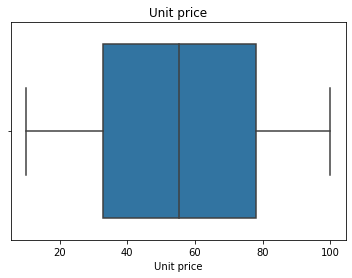

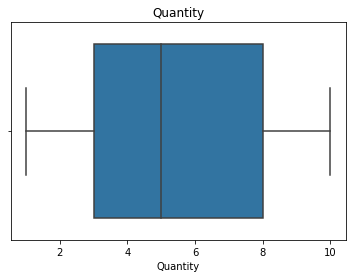

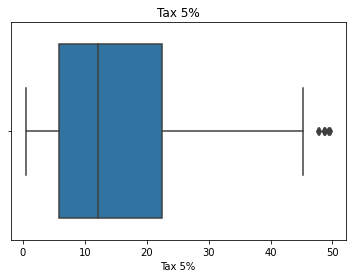

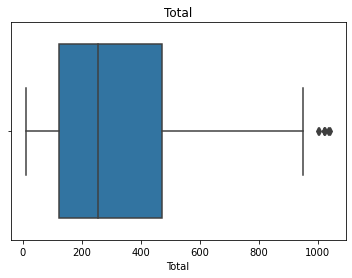

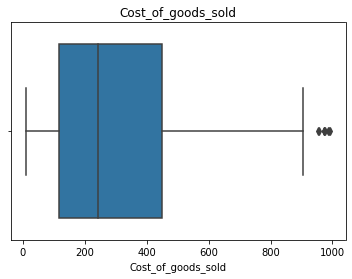

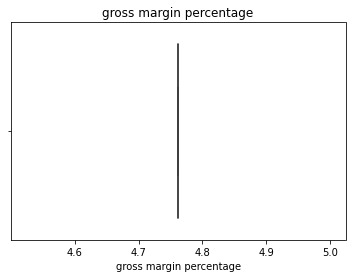

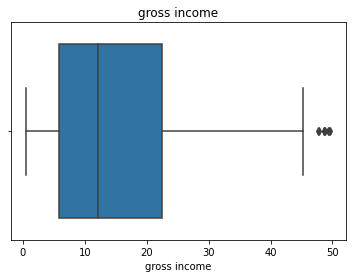

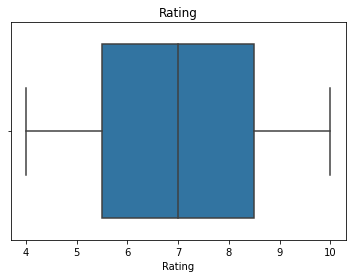

In [53]:
for i in numerical:
  if i == "Date" or i=="Time":
    continue
  plt.title(i)
  sns.boxplot(x=df[i])
  plt.show()

In [54]:
# calculating interquartile range and removing outliers 
outliers_array=["Cost_of_goods_sold","Tax 5%"]
for i in outliers_array:
  q25, q75 = np.percentile(df[i], 25), np.percentile(df[i], 75)
  iqr = q75 - q25
  cut_off=iqr*1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  df=df[(df[i]>=lower)&(df[i]<=upper)]

In [55]:
df.shape

(991, 16)

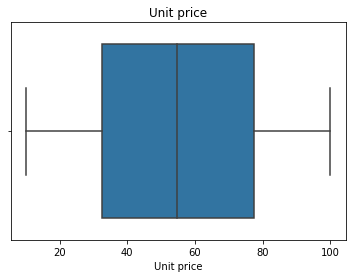

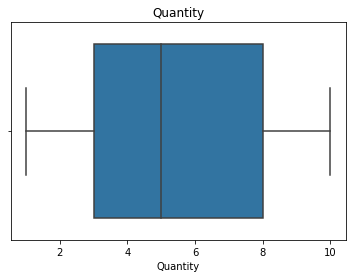

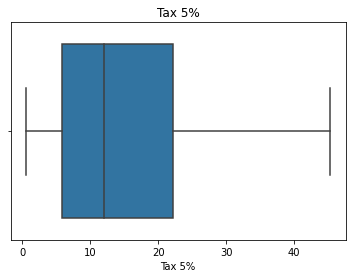

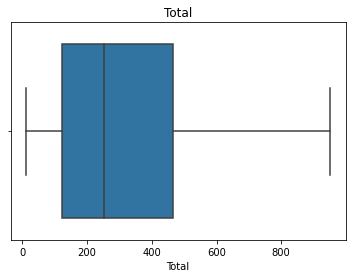

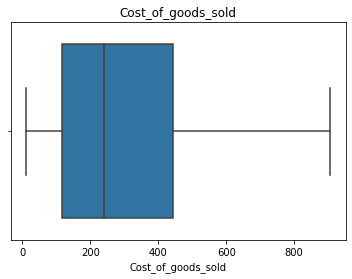

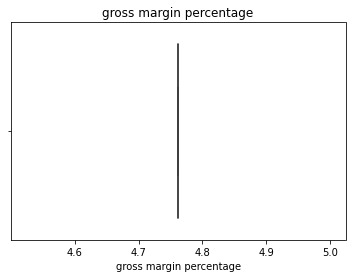

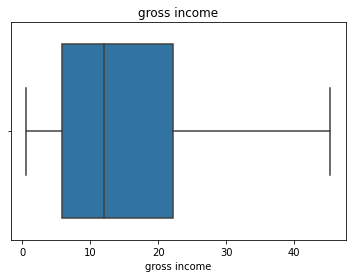

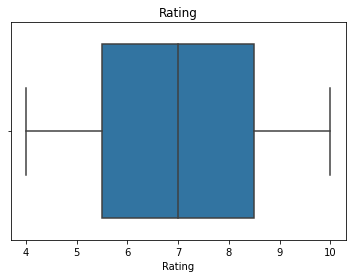

In [56]:
#visualizing the plots again
for i in numerical:
  if i == "Date" or i=="Time":
    continue
  plt.title(i)
  sns.boxplot(x=df[i])
  plt.show()

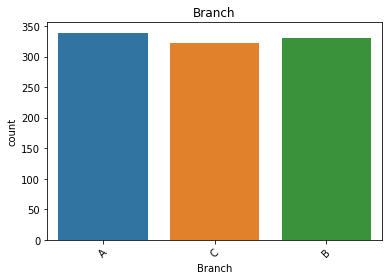

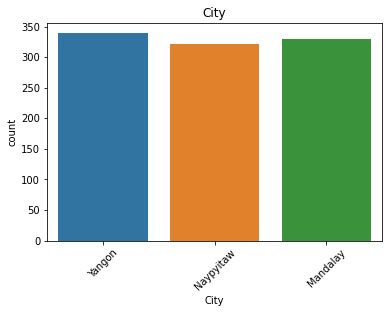

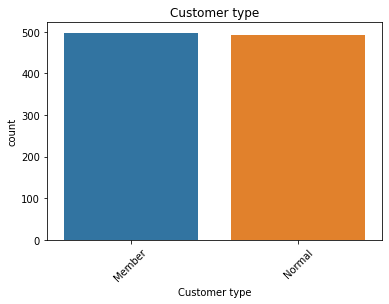

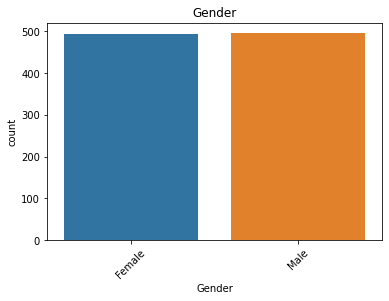

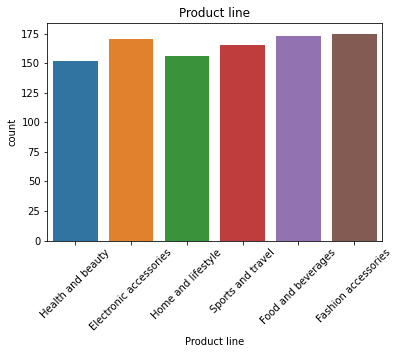

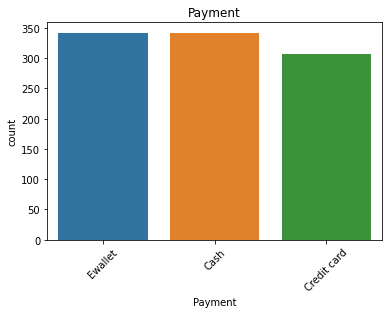

In [57]:
#lets plot the categorical values 
for i in categorical:
  plt.title(i)
  sns.countplot(x=df[i])
  plt.xticks(rotation=45)
  plt.show()
  

Each and every categorical variable is perfectely balanced


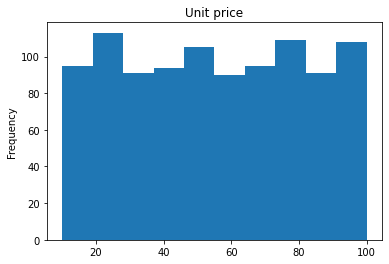

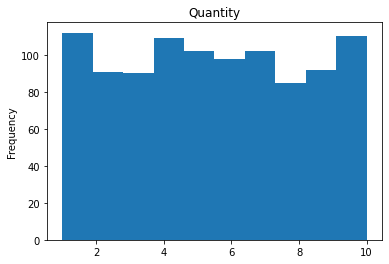

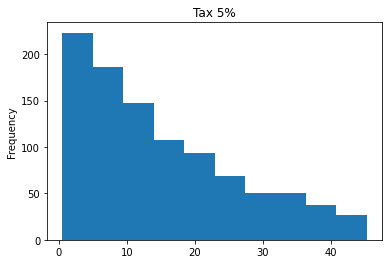

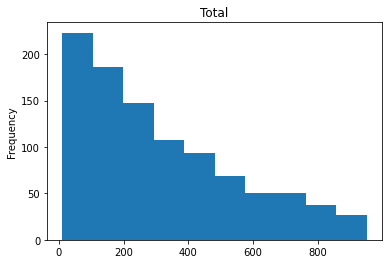

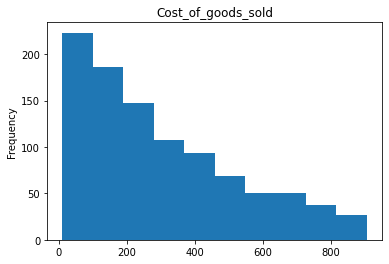

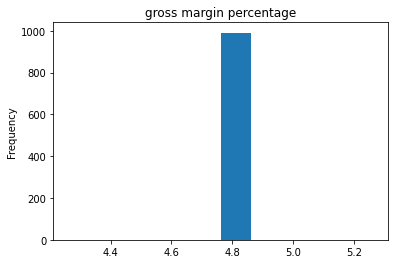

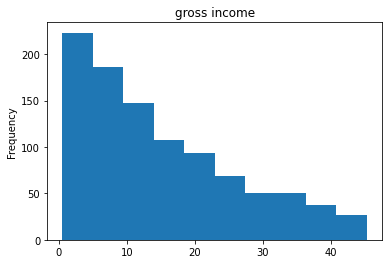

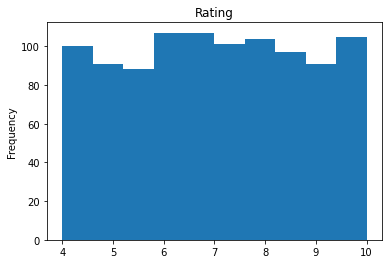

In [58]:
#plotting numerical variables 
for i in numerical:
  if i == "Date" or i=="Time":
    continue
  plt.title(i)
  df[i].plot(kind="hist")
  plt.show()

In [59]:
#Imputing missing values 
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
Cost_of_goods_sold         0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [60]:
#filling null values with some suitable values 
#either we can remove null values as we have very less no of values or we can fill them with the mean (in this case according to the graph of this variable)
df["Unit price"].fillna(np.mean(df["Unit price"]),inplace=True)

In [61]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
Cost_of_goods_sold         0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [62]:
#lets check for duplicate values 
df.duplicated().sum() #we found a duplicate record lets see it

0

In [63]:
df[df.duplicated()==True] #visualizing the duplicated values 

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost_of_goods_sold,gross margin percentage,gross income,Rating


In [64]:
# removing duplicates 
df.drop_duplicates(inplace=True)

In [65]:
df.duplicated().sum()#cross checking 

0

In [66]:
df.shape

(991, 16)

Feature Engineering

In [67]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost_of_goods_sold,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-05-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-05-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-05-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-05-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-05-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [68]:
#lets find the total cost of items with tax
df["total"]=df["Unit price"]*df["Quantity"]+df["Tax 5%"]

In [69]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost_of_goods_sold,gross margin percentage,gross income,Rating,total
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-05-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-05-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,80.2200
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-05-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,340.5255
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-05-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-05-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,634.3785


In [70]:
#lets find the gross margin
df["gross_margin"]=df.total-df['Cost_of_goods_sold']

In [71]:
df.groupby(["Customer type"])["gross_margin"].agg("sum") #getting approx same amount of profits from both customer types 

Customer type
Member    7672.649
Normal    7268.080
Name: gross_margin, dtype: float64

In [72]:
df.groupby(["Gender"])["gross_margin"].agg("sum") #getting approx same amount of profits from both male and female

Gender
Female    7701.815
Male      7238.914
Name: gross_margin, dtype: float64

In [73]:
df.groupby(["Gender","Customer type"],sort=True)["gross_margin"].agg("sum").unstack()

Customer type,Member,Normal
Gender,,
Female,4049.9585,3651.8565
Male,3622.6905,3616.2235


<AxesSubplot:xlabel='Gender'>

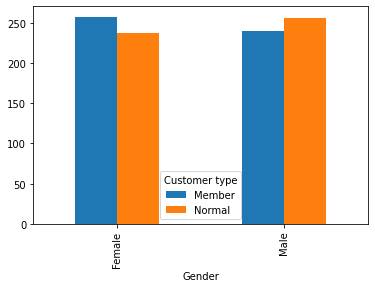

In [74]:
df.groupby(["Gender"])["Customer type"].agg("value_counts").unstack().plot(kind="bar")#females are having more memberships than males 

<AxesSubplot:xlabel='City'>

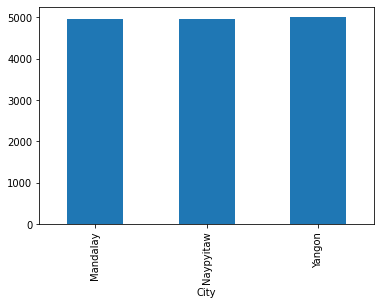

In [75]:
df.groupby(["City"])["gross_margin"].agg("sum").plot(kind="bar") #naypyitaw is generating high profits compared to other cities 

In [76]:
df.groupby(["City","Customer type","Gender"])["gross_margin"].agg("sum").unstack()

Gender                      Female       Male
City      Customer type                      
Mandalay  Member         1278.5920  1278.7740
          Normal         1144.4280  1257.8630
Naypyitaw Member         1502.6490  1058.4685
          Normal         1239.5190  1172.7650
Yangon    Member         1268.7175  1285.4480
          Normal         1267.9095  1185.5955

<AxesSubplot:xlabel='City,Customer type'>

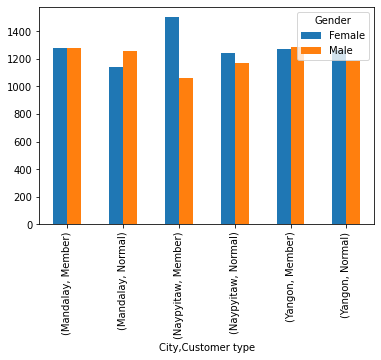

In [77]:
df.groupby(["City","Customer type","Gender"])["gross_margin"].agg("sum").unstack().plot(kind="bar")

> Profits are high in naypyitaw city with females and in mandalay with males both having membership and vice versa in case of inversing genders having low profits 
> Profits have no much difference with the gender having no membership

<AxesSubplot:xlabel='City,Gender'>

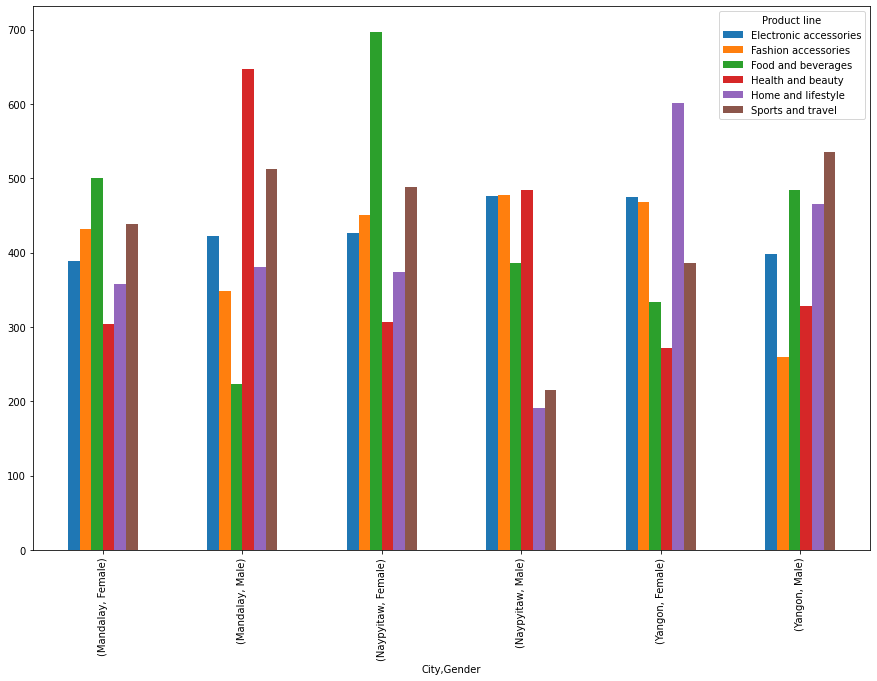

In [78]:

df.groupby(["City","Gender","Product line"])["gross_margin"].agg("sum").unstack().plot(kind="bar",figsize=(15,10))


In [79]:
#manual encoding 
df['Gender'].replace({"Male":1,"Female":0},inplace=True)

In [80]:
df.head() #first 5 records 

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost_of_goods_sold,gross margin percentage,gross income,Rating,total,gross_margin
0,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-05-25 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,26.1415
1,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-05-25 10:29:00,Cash,76.40,4.761905,3.8200,9.6,80.2200,3.8200
2,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-05-25 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,340.5255,16.2155
3,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-05-25 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,23.2880
4,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-05-25 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,30.2085


In [81]:
#high profits generating product lines respective to the type of customers 
pd.pivot_table(df,columns=["City","Gender"],aggfunc="sum",values="gross_margin",index=["Product line"]).idxmax().unstack()

Gender,0,1
City,,
Mandalay,Food and beverages,Health and beauty
Naypyitaw,Food and beverages,Health and beauty
Yangon,Home and lifestyle,Sports and travel


In [82]:
#minimum profits or less profits generating product lines with types of customers 
pd.pivot_table(df,columns=["City","Gender"],aggfunc="sum",values="gross_margin",index=["Product line"]).idxmin().unstack()

Gender,0,1
City,,
Mandalay,Health and beauty,Food and beverages
Naypyitaw,Health and beauty,Home and lifestyle
Yangon,Health and beauty,Fashion accessories
